In [2]:
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders
import pandas as pd
from arcgis.geometry import filters
import arcpy

import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
gis = GIS("http://slustl.maps.arcgis.com/home", "kevineblimit_slustl")

Enter password: ········


In [4]:
path = os.getcwd()

In [6]:
baseURL = "http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1/query"
#build query
where = "STATE_NAME='Missouri'"
fields = "*"

query = "?where={}&outFields={}&returnGeometry=true&f=json".format(where, fields)

fsURL = baseURL + query

fs = arcpy.FeatureSet()
fs.load(fsURL)

In [7]:
print(fsURL)

http://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/Tapestry_Households/FeatureServer/1/query?where=STATE_NAME='Missouri'&outFields=*&returnGeometry=true&f=json


In [12]:
arcpy.CopyFeatures_management(fs, r"C:\Users\eblimitkk\Desktop\GIS5091\advanced_class\Project 3\MO_1")

<Result 'C:\\Users\\eblimitkk\\Desktop\\GIS5091\\advanced_class\\Project 3\\MO_1.shp'>

In [13]:
fc = r"C:\Users\eblimitkk\Desktop\GIS5091\advanced_class\Project 3\MO_1"

In [14]:
fc

'C:\\Users\\eblimitkk\\Desktop\\GIS5091\\advanced_class\\Project 3\\MO_1'

In [17]:
csv_file = os.path.join(path,'fc.csv')

### I saved the CSV in a different way because the code way doesn't work for me :(

In [18]:
df = pd.read_csv(csv_file)
df

,FID,Shape *,ID,NAME,STATE_NAME,ST_ABBREV,County_ARE,TSEGNUM,TSEGCODE,TSEGNAME,...,THHGRPL7,THHGRPL8,THHGRPL9,THHGRPL10,THHGRPL11,THHGRPL12,THHGRPL13,THHGRPL14,Shape_Leng,Shape_Area
0,0,Polygon,29001,Adair County,Missouri,MO,569.508658,38,8F,Old and Newcomers,...,0,2178,0,718,414,552,0,2216,0,0
1,1,Polygon,29003,Andrew County,Missouri,MO,436.317612,26,6F,Heartland Communities,...,0,0,0,456,0,0,0,0,0,0
2,2,Polygon,29005,Atchison County,Missouri,MO,556.848560,24,6D,Prairie Living,...,0,0,0,0,0,324,0,0,0,0
3,3,Polygon,29007,Audrain County,Missouri,MO,696.737302,58,12C,Small Town Simplicity,...,0,537,0,0,0,2879,0,0,0,0
4,4,Polygon,29009,Barry County,Missouri,MO,790.957836,46,10A,Southern Satellites,...,272,0,688,5942,238,382,0,0,0,0
5,5,Polygon,29011,Barton County,Missouri,MO,596.747317,26,6F,Heartland Communities,...,0,0,0,327,0,261,0,0,0,0
6,6,Polygon,29013,Bates County,Missouri,MO,851.416977,24,6D,Prairie Living,...,0,0,0,1588,0,1468,0,0,0,0
7,7,Polygon,29015,Benton County,Missouri,MO,752.569499,25,6E,Rural Resort Dwellers,...,0,0,1059,977,0,530,0,0,0,0
8,8,Polygon,29017,Bollinger County,Missouri,MO,621.137049,47,10B,Rooted Rural,...,0,0,0,4169,0,817,0,0,0,0
9,9,Polygon,29019,Boone County,Missouri,MO,691.121917,35,8C,Bright Young Professionals,...,1844,11644,1499,0,10007,1376,0,11807,0,0


In [19]:
print(df.loc[:,"TLIFENAME"].mode())

0    Cozy Country Living
dtype: object


['Middle Ground' 'Cozy Country Living' 'Hometown' 'Rustic Outposts'
 'Family Landscapes' 'GenXurban' 'Senior Styles' 'Scholars and Patriots']


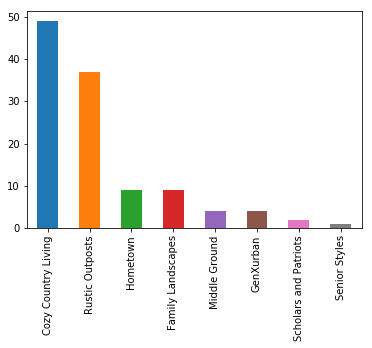

In [20]:
TLIFENAME=df.TLIFENAME.unique()
print(TLIFENAME)
x = df.loc[df['TLIFENAME'] == 'Middle Ground']
tl_name = df.TLIFENAME.value_counts()
tl_name.plot.bar()

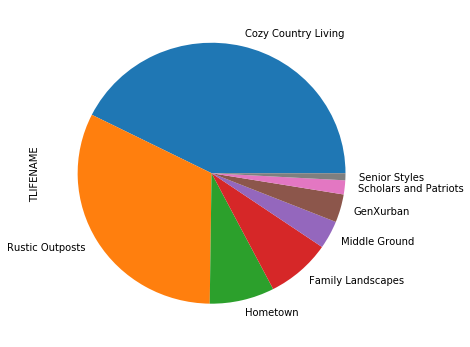

In [21]:
tl_name.plot.pie(figsize=(6, 6))

In [22]:
TSEGNAME=df.TSEGNAME.unique()
print(TSEGNAME)

['Old and Newcomers' 'Heartland Communities' 'Prairie Living'
 'Small Town Simplicity' 'Southern Satellites' 'Rural Resort Dwellers'
 'Rooted Rural' 'Bright Young Professionals' 'Traditional Living'
 'Salt of the Earth' 'Middleburg' 'Green Acres' 'Rural Bypasses'
 'Rustbelt Traditions' 'Senior Escapes' 'Midlife Constants'
 'College Towns' 'Soccer Moms' 'Family Foundations' 'Emerald City']


In [23]:
print(df.loc[:,"TSEGNAME"].mode())

0    Rooted Rural
dtype: object


In [24]:
ts_name = df.TSEGNAME.value_counts()
ts_name

Rooted Rural                  27
Heartland Communities         16
Prairie Living                16
Salt of the Earth              9
Middleburg                     8
Southern Satellites            8
Small Town Simplicity          6
Rural Resort Dwellers          4
Green Acres                    4
Midlife Constants              2
Old and Newcomers              2
College Towns                  2
Rustbelt Traditions            2
Rural Bypasses                 2
Traditional Living             2
Family Foundations             1
Bright Young Professionals     1
Emerald City                   1
Soccer Moms                    1
Senior Escapes                 1
Name: TSEGNAME, dtype: int64

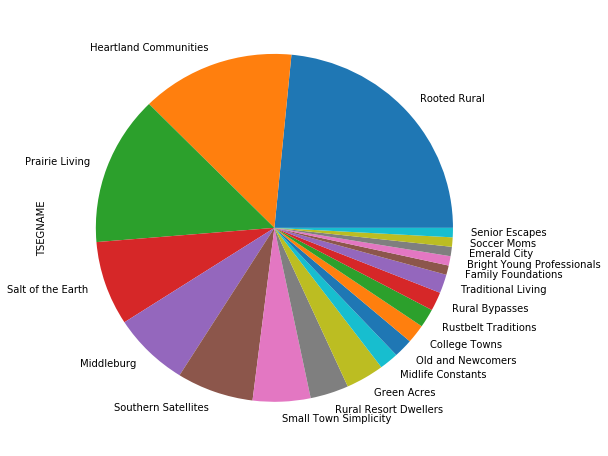

In [27]:
ts_name.plot.pie(figsize=(8, 8))

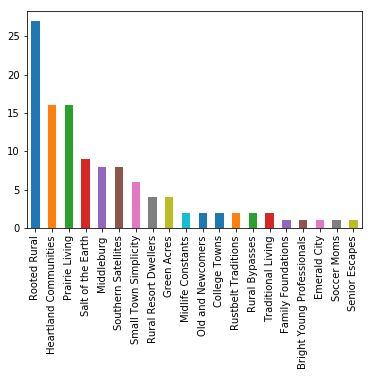

In [28]:
ts_name.plot.bar()

In [30]:
ts_name


Rooted Rural                  27
Heartland Communities         16
Prairie Living                16
Salt of the Earth              9
Middleburg                     8
Southern Satellites            8
Small Town Simplicity          6
Rural Resort Dwellers          4
Green Acres                    4
Midlife Constants              2
Old and Newcomers              2
College Towns                  2
Rustbelt Traditions            2
Rural Bypasses                 2
Traditional Living             2
Family Foundations             1
Bright Young Professionals     1
Emerald City                   1
Soccer Moms                    1
Senior Escapes                 1
Name: TSEGNAME, dtype: int64

In [31]:
tl_name

Cozy Country Living      49
Rustic Outposts          37
Hometown                  9
Family Landscapes         9
Middle Ground             4
GenXurban                 4
Scholars and Patriots     2
Senior Styles             1
Name: TLIFENAME, dtype: int64

In [32]:
pd.crosstab(df.TSEGNAME,df.TLIFENAME)

TLIFENAME,Cozy Country Living,Family Landscapes,GenXurban,Hometown,Middle Ground,Rustic Outposts,Scholars and Patriots,Senior Styles
TSEGNAME,,,,,,,,
Bright Young Professionals,0,0,0,0,1,0,0,0
College Towns,0,0,0,0,0,0,2,0
Emerald City,0,0,0,0,1,0,0,0
Family Foundations,0,0,0,1,0,0,0,0
Green Acres,4,0,0,0,0,0,0,0
Heartland Communities,16,0,0,0,0,0,0,0
Middleburg,0,8,0,0,0,0,0,0
Midlife Constants,0,0,2,0,0,0,0,0
Old and Newcomers,0,0,0,0,2,0,0,0


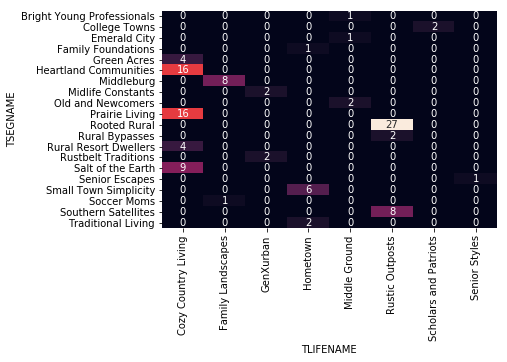

In [33]:
sns.heatmap(pd.crosstab(df.TSEGNAME, df.TLIFENAME),
             annot=True, cbar=False)